In [1]:
cd ..

/home/hyunjun/workspace/FactorSearch (mom)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
algo = 'RL'

pf = pd.read_csv(f'result/seed2/PF_{algo}.csv', index_col=0)
pv = pd.read_csv(f'result/seed2/PV_{algo}.csv', index_col=0)
po = pd.read_csv(f'result/seed2/PO_{algo}.csv', index_col=0)
ti = pd.read_csv(f'result/seed2/TI_{algo}.csv', index_col=0, dtype=str)
me = pd.read_csv(f'result/seed2/Me_{algo}.csv', index_col=0)

In [4]:
me

,0
sharpe,0.0124
rankic,0.2997
mdd,42.0197


In [13]:
from agent import RANDOMSEARCH

all = ['1M', '3M', '6M', '9M', '12M', 
       '12_1M', '12_3M', '12_6M', 
       '12_9M', 'Kratio']

M1 = []
M3 = []
M6 = []
M9 = []
M12 = []
M12_1 = []
M12_3 = []
M12_6 = []
M12_9 = []
KRATIO = []

config = {'Number': 10, 
          'Quantile': 1,
          'Balance': 1000,
          'Quarter': '1Q',
          'Factors': all,
          'Dim': 10}

for factor in all:
    
    print(factor)
    for i in range(1, 6):
        config['Quantile'] = i
        config['Factors'] = [factor]

        randomsearch = RANDOMSEARCH(config)
        randomsearch.init()
        PVs, PFs, TIs, POs, result = randomsearch.test('2001','2016')

        if factor == '1M':
            M1.append(PVs)

        if factor == '3M':
            M3.append(PVs)

        if factor == '6M':
            M6.append(PVs)

        if factor == '9M':
            M9.append(PVs)

        if factor == '12M':
            M12.append(PVs)

        if factor == '12_1M':
            M12_1.append(PVs)

        if factor == '12_3M':
            M12_3.append(PVs)

        if factor == '12_6M':
            M12_6.append(PVs)

        if factor == '12_9M':
            M12_9.append(PVs)

        if factor == 'Kratio':
            KRATIO.append(PVs)

1M
3M
6M
9M
12M
12_1M
12_3M
12_6M
12_9M
Kratio


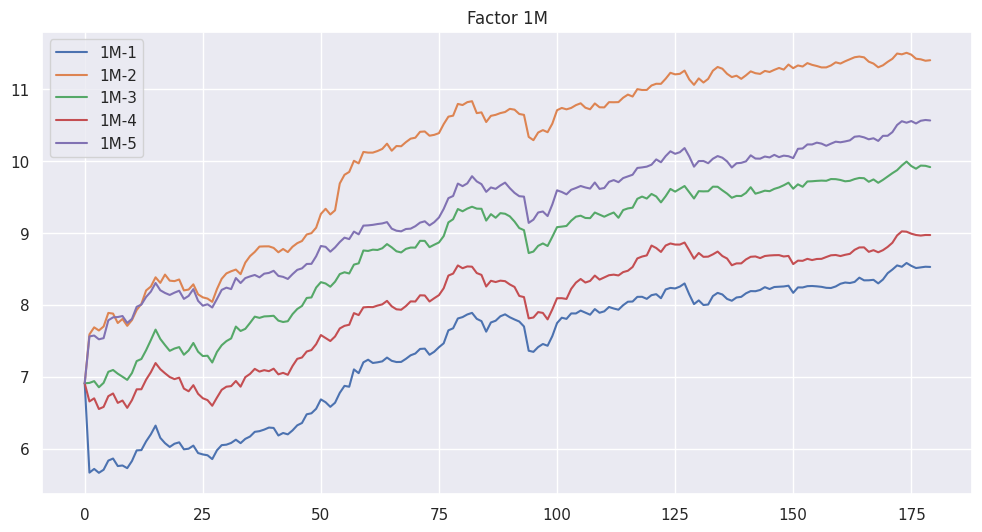

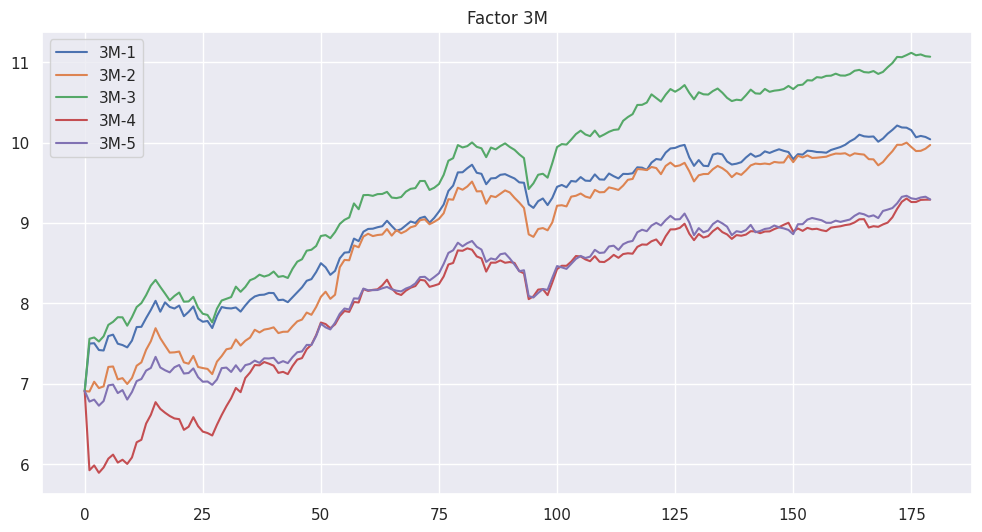

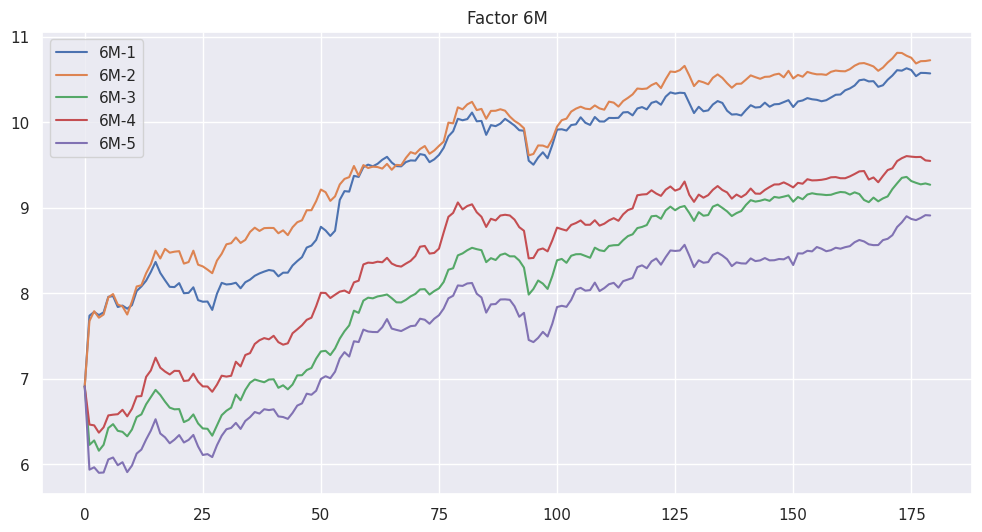

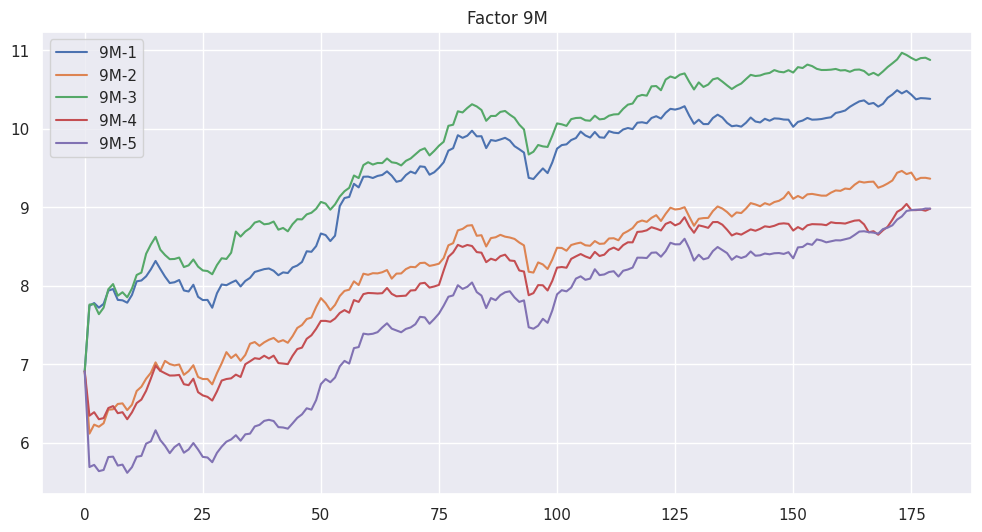

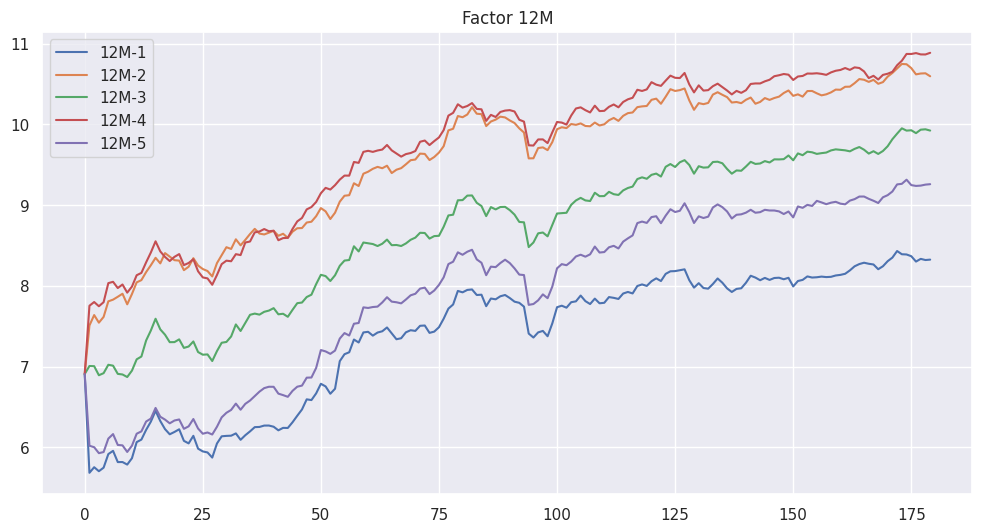

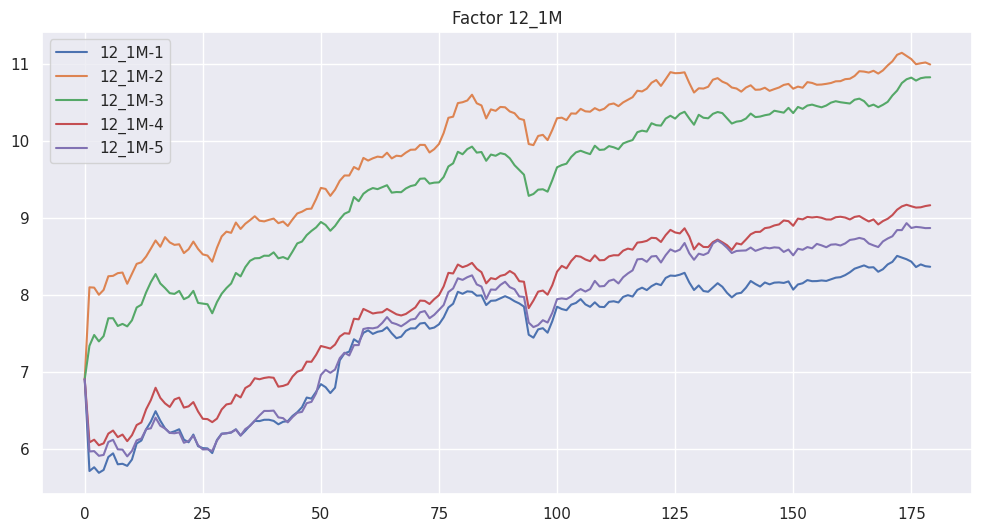

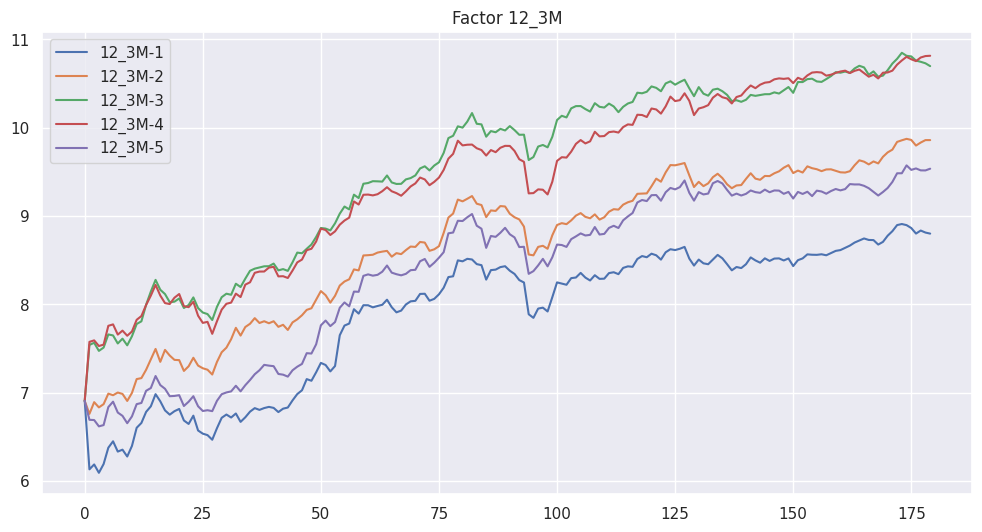

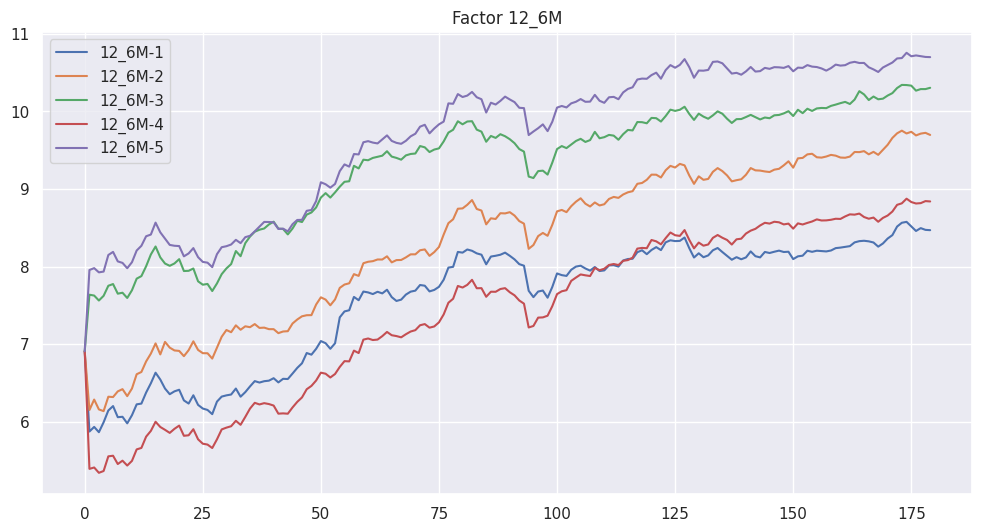

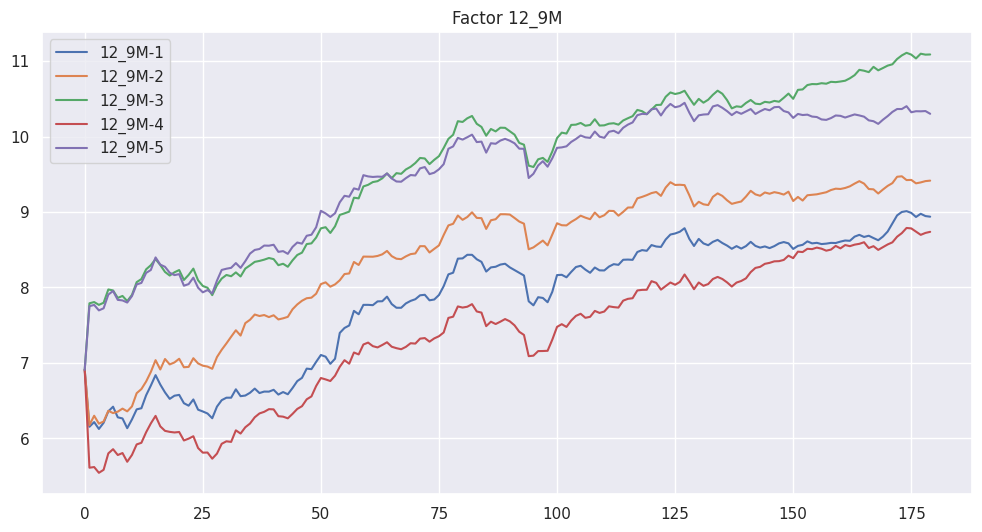

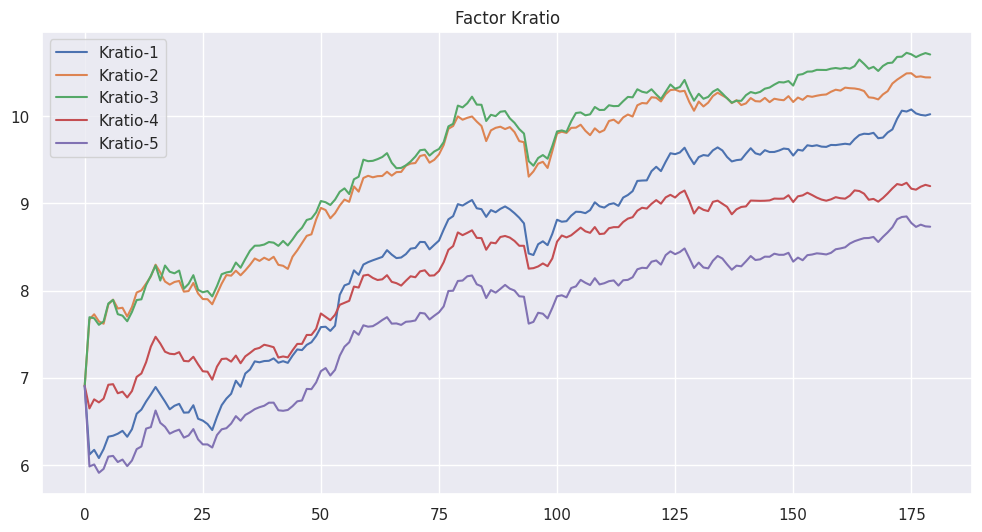

In [14]:
dicts = {'1M':M1, '3M':M3, '6M':M6, '9M':M9, 
         '12M':M12, '12_1M':M12_1, '12_3M':M12_3, 
         '12_6M':M12_6, '12_9M':M12_9, 'Kratio':KRATIO}


for factor in all:
    sns.set(style='darkgrid')
    plt.figure(figsize=(12, 6))

    for i in [0, 1, 2, 3, 4]:
        plt.plot(np.log(dicts[factor][i]), label=f'{factor}-{i+1}')
        plt.legend()
        plt.title(f'Factor {factor}')

    plt.show()